<a href="https://colab.research.google.com/github/Je73hwg/1BM22CS046_MLLAB/blob/main/1BM22CS046_LAB-11_K-MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

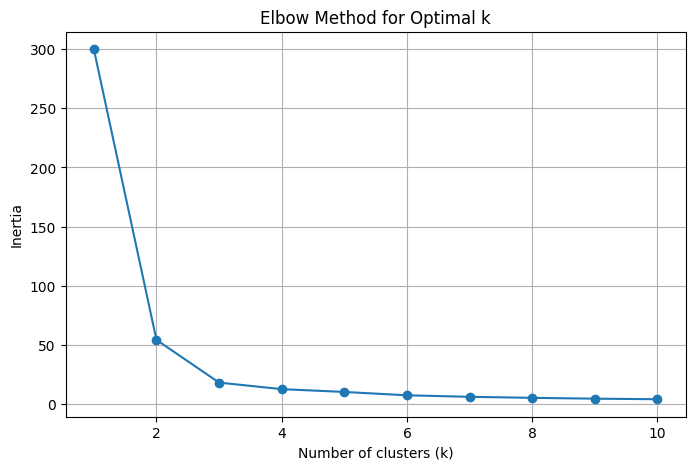

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load the Iris dataset and select petal length and width
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
X = data[["petal length (cm)", "petal width (cm)"]]

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Elbow Method to find optimal k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

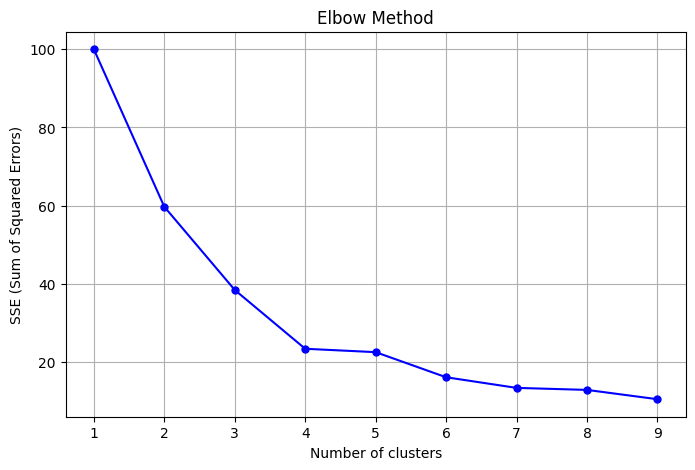

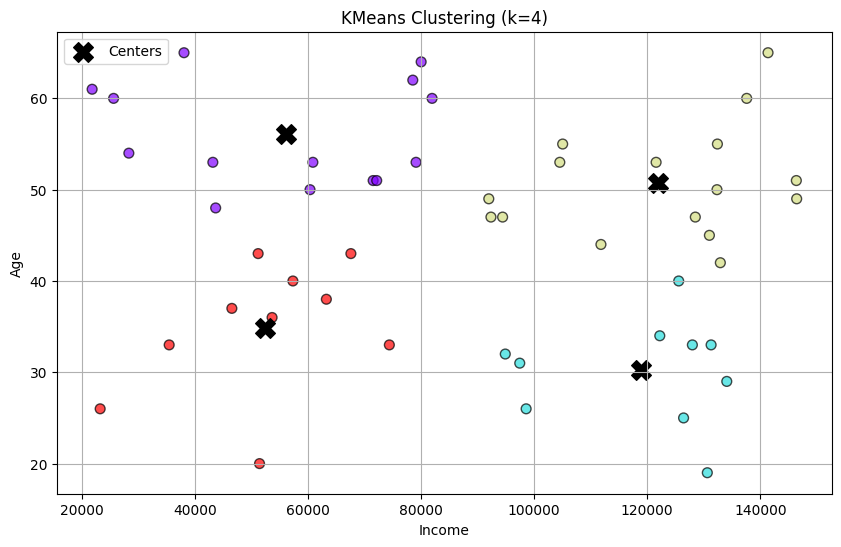

             Name  Age     Income  Cluster
0  Sarah Oconnell   40   57348.91        3
1   Marcus Steele   60   81957.76        0
2  Margaret Henry   55  105046.68        2
3    Alexis Chung   42  132926.70        2
4   Paul Robinson   26   23272.04        3


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("/content/income (1).csv")  # Update path if needed

# Step 2: Select features for clustering (only those that exist)
X = df[["Income", "Age"]]

# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow Method to find optimal number of clusters
sse = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE vs Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, 'bo-', markersize=5)
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 5: Choose optimal number of clusters from elbow point (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Step 6: Visualize clusters based on Income and Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Age'], c=df['Cluster'], cmap='rainbow', s=50, alpha=0.7, edgecolors='k')
centers = kmeans.cluster_centers_
centers_unscaled = scaler.inverse_transform(centers)

# Plot cluster centers
plt.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1], c='black', s=200, marker='X', label='Centers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title(f'KMeans Clustering (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print first few rows with clusters
print(df.head())
